In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
df=pd.read_excel("/content/SALES.xlsx")
df.shape
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.sample(5)


,RegionCode,Region,TerritoryCode,Territory,BrandCode,Brand,Actual Date,Retail_Sales,Whole_Sale
5342,4,Southern,40,Sahiwal,5,Rejoy,2021-02-16,0.00100,0.0
19268,4,Southern,32,Bahawalpur,2,Parle-G,2021-07-01,0.20000,0.0
36308,1,Central,1,Faisalabad,6,Digestive,2021-12-09,0.16048,0.0
5029,2,North,12,Chakwal,4,Morning Coffee,2021-02-14,0.01300,0.0
62224,1,Central,4,Kasur,1,Cabin,2022-06-23,0.00040,0.0


## What are the total retail and wholesale sales for each year (2021 vs 2022)?

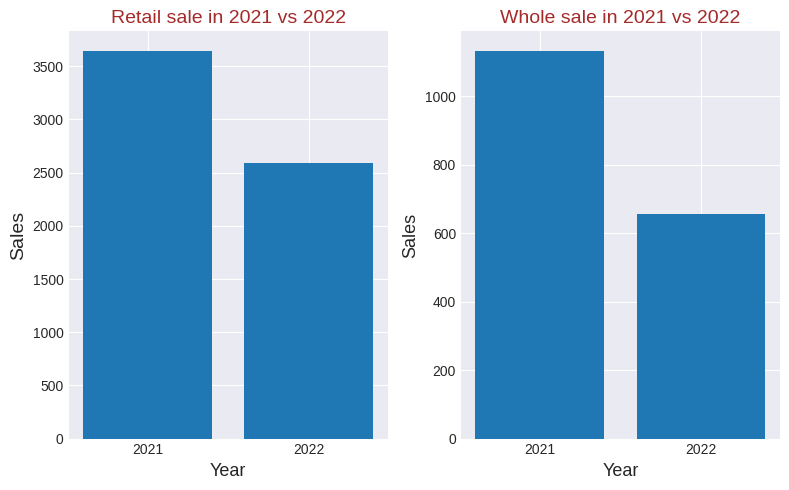

In [56]:
df["Year"]=df["Actual Date"].dt.year

sale=df.groupby("Year")[["Retail_Sales","Whole_Sale"]].sum().reset_index()
fig,ax=plt.subplots(1,2,figsize=(8,5))
ax[0].bar(sale["Year"],sale["Retail_Sales"])
ax[0].set_title("Retail sale in 2021 vs 2022",fontsize=14,color="brown")
ax[0].set_xticks(sale["Year"])
ax[0].set_xlabel("Year",fontsize=13)
ax[0].set_ylabel("Sales",fontsize=14)


ax[1].bar(sale["Year"],sale["Whole_Sale"])
ax[1].set_title("Whole sale in 2021 vs 2022",fontsize=14,color="brown")
ax[1].set_xticks(sale["Year"])
ax[1].set_xlabel("Year",fontsize=13)
ax[1].set_ylabel("Sales",fontsize=13)

plt.tight_layout()
plt.show()

# Both retail sale and whole sale business had run amazing in year 2021 as compare to 2022.

## How do retail and wholesale sales vary by Region?

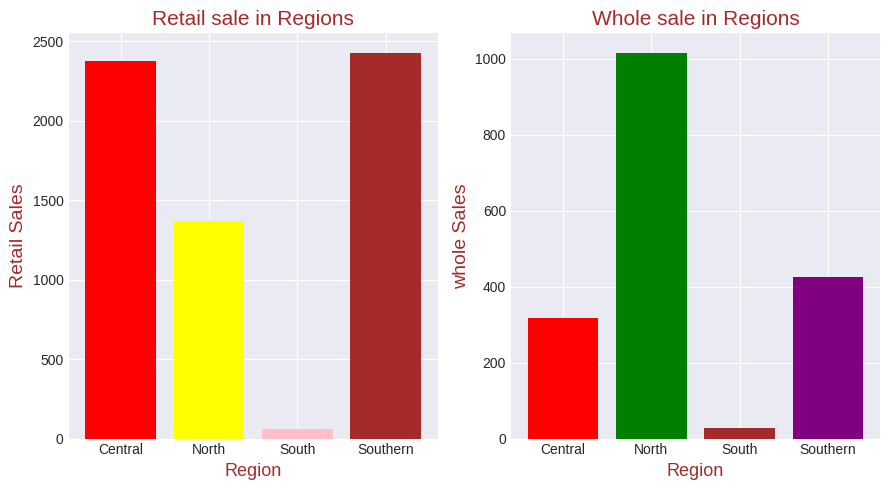

In [57]:
sale=df.groupby("Region")[["Retail_Sales","Whole_Sale"]].sum().reset_index()
fig,ax=plt.subplots(1,2,figsize=(9,5))
ax[0].bar(sale["Region"],sale["Retail_Sales"],color=["Red","Yellow","Pink","Brown"])
ax[0].set_title("Retail sale in Regions",fontsize=15,color="brown")
ax[0].set_xticks(sale["Region"])
ax[0].set_xlabel("Region",fontsize=13,color="brown")
ax[0].set_ylabel("Retail Sales",fontsize=14,color="brown")




ax[1].bar(sale["Region"],sale["Whole_Sale"],color=["Red","Green","Brown","Purple"])
ax[1].set_title("Whole sale in Regions",fontsize=15,color="brown")
ax[1].set_xticks(sale["Region"])
ax[1].set_xlabel("Region",fontsize=13,color="brown")
ax[1].set_ylabel("whole Sales",fontsize=14,color="brown")

plt.tight_layout()
plt.show()
# Retail Sale takes huge market in central and southern part of India.However,Whole sale deals are made more in northern area which means
# people like to take more items in bulk or business run here at center level.

# Which Brands have the highest total retail sales across all regions?

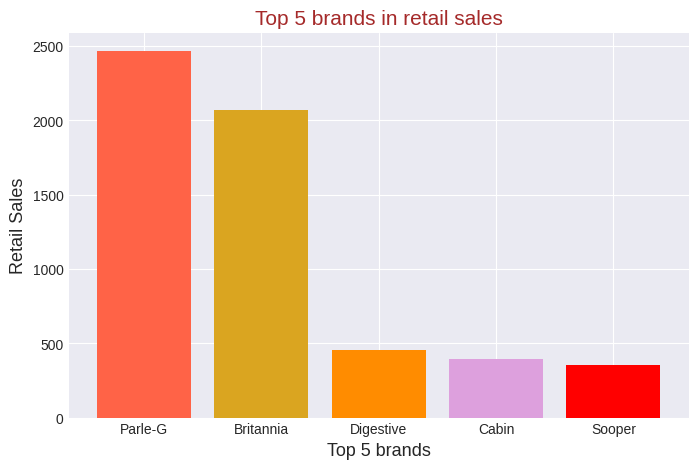

In [58]:
# Top 5 brands displaying in charts
brandy=df.groupby("Brand")["Retail_Sales"].sum().sort_values(ascending=False).reset_index()
brandy=brandy.head(5)
plt.figure(figsize=(8,5))

#creating bar graph now
plt.bar(brandy["Brand"],brandy["Retail_Sales"],color=["tomato",'goldenrod','darkorange','plum',"Red"])
plt.xlabel("Top 5 brands",fontsize=13)
plt.ylabel("Retail Sales",fontsize=13)
plt.title("Top 5 brands in retail sales",fontsize=15,color="brown")
plt.show()
# Customers are much likely to  buy products of Parle-g and britania in india.

## How did retail sales for the brand “Morning Coffee” change over time from 2021 to 2022?

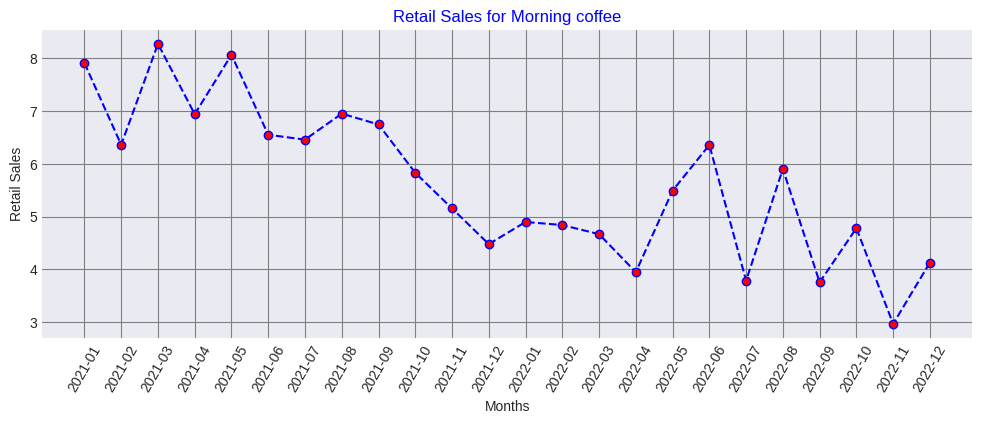

In [59]:
# I will find from every month of 2021 to every month of 2022 for retail only and morning coffee brand
df["year_month"]=df["Actual Date"].dt.to_period("M")
listy=df[df["Brand"]=="Morning Coffee"]
listy=listy.groupby("year_month")["Retail_Sales"].sum().reset_index()
plt.figure(figsize=(12,4))
plt.plot(listy["year_month"].astype(str),listy["Retail_Sales"],color="blue",marker="o",linestyle="--",markerfacecolor="red")
plt.xlabel("Months")
plt.ylabel("Retail Sales")
plt.grid(True,color="grey")
plt.title("Retail Sales for Morning coffee",color="Blue",fontsize=12)
plt.xticks(rotation=60)
plt.show()


#Morning coffe seems to have quite fluctuting graph its demand drop at the end of 2022 to lowest

# Which brand had the most consistent retail sales across months in 2021–2022?

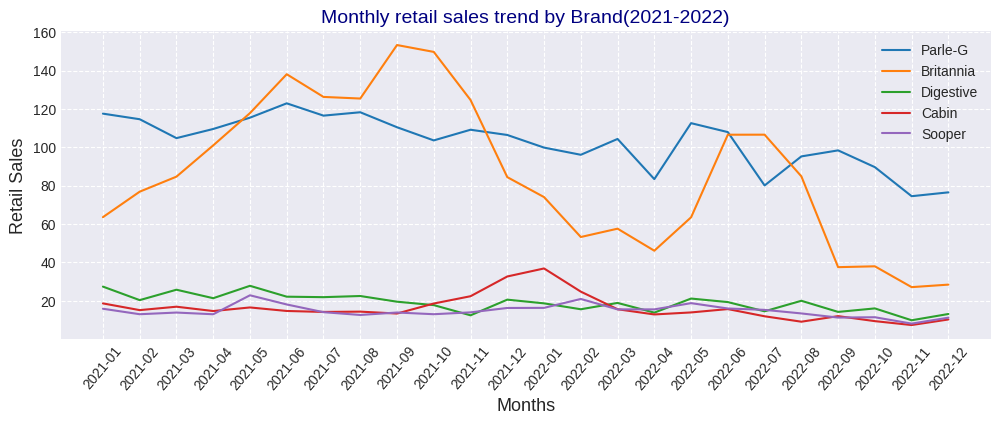

In [ ]:
sorted_ar=df.sort_values(by="year_month",ascending=True).reset_index()
topbrand=sorted_ar.groupby("Brand")["Retail_Sales"].sum().sort_values(ascending=False).head(5).reset_index()
sorted_ar=sorted_ar.groupby(["Brand","year_month"])["Retail_Sales"].sum().reset_index()
plt.figure(figsize=(12,4))
for bd in topbrand["Brand"]:
  eachrow=sorted_ar[sorted_ar["Brand"]==bd]
  plt.plot(eachrow["year_month"].astype(str), eachrow["Retail_Sales"], label=bd)

plt.xlabel("Months",fontsize=13)
plt.ylabel("Retail Sales",fontsize=13)
plt.title("Monthly retail sales trend by Brand(2021-2022)",fontsize=14,color="navy")
plt.grid(True,color="grey",alpha=0.2,linestyle='--')
plt.legend()
plt.xticks(rotation=50)
plt.show()


# Pale-G is consistent.Britania has much fluctuations.

# Are there any seasonal patterns or monthly sales trends for the top 3 brands? How do sales fluctuate across different months of the year?"

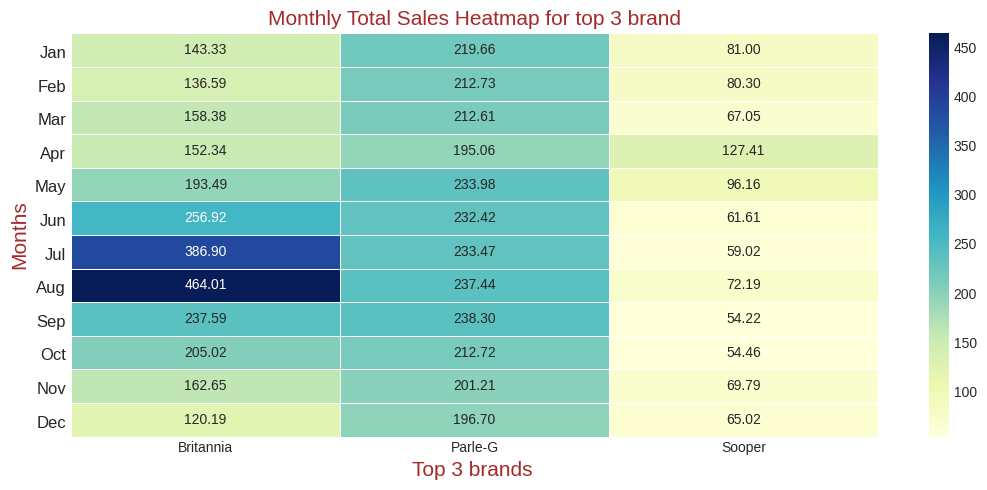

In [61]:
df["Total Sale"]=df["Retail_Sales"]+df["Whole_Sale"]
df["month"]=df["Actual Date"].dt.month

monthly_sale=df.groupby(["Brand","month"])["Total Sale"].sum().reset_index()

#Top 3 brands
top3=monthly_sale.groupby("Brand")["Total Sale"].sum().sort_values(ascending=False).head(3).reset_index()
top3_brand=top3["Brand"].tolist()
eachrow=monthly_sale[monthly_sale["Brand"].isin(top3_brand)]
heat_data=eachrow.pivot(index="month",columns="Brand",values="Total Sale")
plt.figure(figsize=(11,5))
sns.heatmap(heat_data,annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.6)

plt.xlabel("Top 3 brands ",color="brown",fontsize=15)
plt.ylabel("Months",color="brown",fontsize=15)
plt.yticks( ticks=[i + 0.6 for i in range(12)], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=0,fontsize=12)  # Aligns vertically center

plt.title("Monthly Total Sales Heatmap for top 3 brand",fontsize=15,color="brown")
plt.tight_layout()
plt.show()





My insights from the project:
I noticed that sales fluctuated noticeably across different months, which suggests possible seasonality or marketing influence. This made me think — if sales peak consistently in specific periods, then company could strategically boost marketing,invest in that brand or launch offers in those months to maximize revenue. Some company like Britannia and Parle-G are doing great job mostly in months of july,august and september  which made me question what might be reason:Festival season,a campaign so on.Similarly, during low-performing months, they could investigate causes like reduced demand or supply issues and take corrective steps.